<a href="https://colab.research.google.com/github/tiaracantiq/gitgithub/blob/main/Analisis_Lanjutan_dan_Interpretasi_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset penguin
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Bersihkan data
df.dropna(inplace=True)


In [8]:
anova = stats.f_oneway(
    df[df['species'] == 'Adelie']['body_mass_g'],
    df[df['species'] == 'Chinstrap']['body_mass_g'],
    df[df['species'] == 'Gentoo']['body_mass_g']
)

print("Hasil ANOVA:", anova)


Hasil ANOVA: F_onewayResult(statistic=np.float64(341.8948949481461), pvalue=np.float64(3.74450512630046e-81))


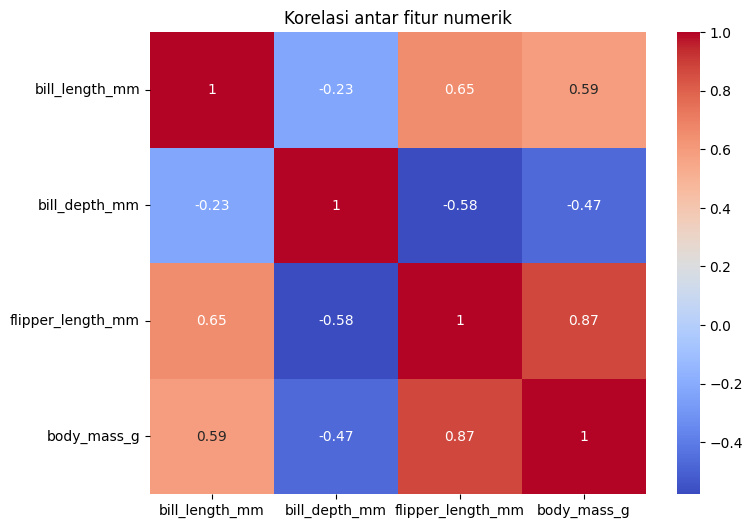

In [9]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()


In [10]:
import statsmodels.formula.api as smf

# Membuat model regresi linear
model = smf.ols('body_mass_g ~ flipper_length_mm + bill_length_mm', data=df).fit()

# Menampilkan ringkasan model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     530.4
Date:                Tue, 10 Jun 2025   Prob (F-statistic):          8.15e-104
Time:                        03:57:33   Log-Likelihood:                -2460.6
No. Observations:                 333   AIC:                             4927.
Df Residuals:                     330   BIC:                             4939.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5836.2987    312.60

In [11]:
from sklearn.metrics import mean_absolute_error, r2_score

# y_true: nilai asli dari kolom target
y_true = df['body_mass_g']

# y_pred: nilai prediksi dari model regresi
y_pred = model.predict(df)

# Menghitung MAE dan R-squared
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Menampilkan hasil evaluasi model
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")


MAE: 311.85
R-squared: 0.76


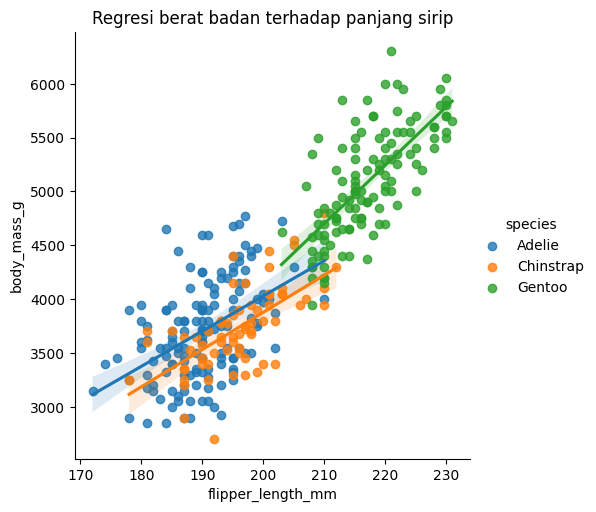

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi regresi linear antara flipper_length_mm dan body_mass_g, dikelompokkan berdasarkan spesies
sns.lmplot(x='flipper_length_mm', y='body_mass_g', hue='species', data=df)

# Menambahkan judul pada plot
plt.title("Regresi berat badan terhadap panjang sirip")

# Menampilkan plot
plt.show()
